In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from logistics import new_cav_model , J_analytical_new, fourier_transform_matrix, fast_f_t, spectrum_1
from logistics_exact_cavity import Driven_cavity_class,two_modes_cavity
from numpy.fft import fft,fftfreq
from scipy.interpolate import interp1d	

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.size'] = 14  


I believe there is no ' intermediate limit' , just markovian and non Markovian. The idea is that one and two-mode participation is understandable, but more is not (analyticaly)

In [71]:
def exp000(phi,gamma,tau_values):
    t_list=[]
    pe_list = []
    fft_i=[]
    spe =[]
    freqs=[]

    for tau in tau_values:
        dt = tau/100 
        t_max=150*tau
        cavity=new_cav_model(gamma,phi,tau,0)
        cavity.evolve(t_max,dt)
        t,e = cavity.excited_state([1,0])
        t_list.append(t)
        pe_list.append(e)
        
        _,I = cavity.current([1,0])
        _,ffti=fast_f_t(t[t/tau>10],I[t/tau>10],400)   # looking at the stable current 
        fft_i.append(ffti)
        
        a_out=cavity.a_out_array
        w,aw =fourier_transform_matrix(t,a_out,400)
        spec = spectrum_1(aw,[1,0])
        freqs.append(w)
        spe.append(spec)
    return t_list,pe_list,fft_i,spe,freqs

In [87]:
phi = np.pi 
gamma = 1 
tau_values = [0.1,0.5,2,5]

t_list,pe_list,fft_i,spe,freqs = exp000(phi,gamma,tau_values)

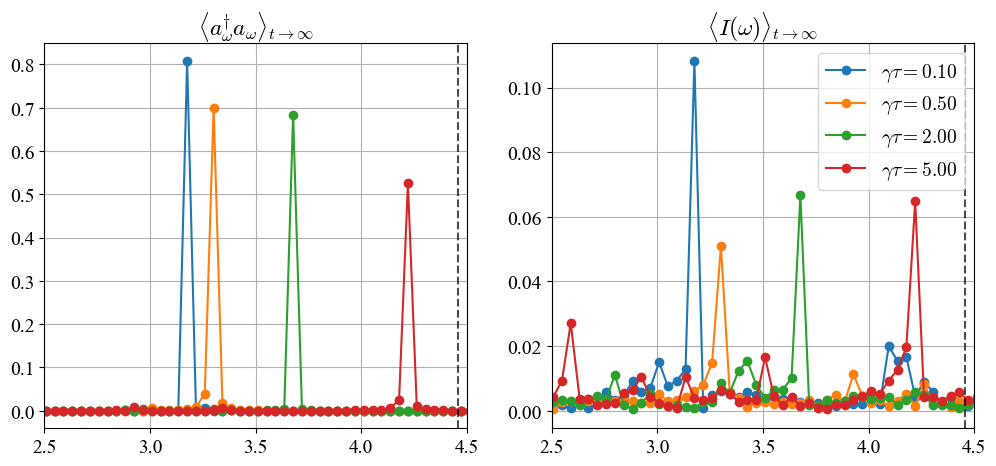

In [92]:

fig,axs = plt.subplots(1,2,figsize = (12,5))

for n in range(len(tau_values)):
	axs[0].plot(freqs[n]*tau_values[n],np.abs(spe[n])/np.sum(np.abs(spe[n])),'-o')
	axs[1].plot(freqs[n]*tau_values[n],np.abs(fft_i[n]),'-o',label = rf"$\gamma \tau = {gamma*tau_values[n]:.2f}$")

m=3
w_ref = np.sqrt(np.pi**2+2*gamma*tau_values[m])

axs[0].grid()
axs[0].set_title(r"$\langle a_{\omega}^{\dag}a_{\omega}\rangle_{t\to \infty} $")
axs[0].set_xlim(2.5,4.5)
axs[0].axvline(w_ref,linestyle='--',color='k',alpha=0.7)

axs[1].grid()
axs[1].set_title(r"$\langle I(\omega)\rangle_{t\to \infty} $")
axs[1].legend()
axs[1].set_xlim(2.5,4.5)
axs[1].axvline(w_ref,linestyle='--',color='k',alpha=0.7)


plt.show()
